In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

path = r'\Users\James\Desktop\Datasets/'
files = ['GBvideos.csv','USvideos.csv']
df_GB = pd.read_csv(path+files[0])
df_US = pd.read_csv(path+files[1])

In [3]:
print(df_GB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB
None


All columns have the correct data type.

In [4]:
print(df_GB[df_GB['description'].isna()]['description'])
df_GB['description'] = df_GB['description'].apply(lambda x: 'No Description' if x == np.nan else x)
print(df_GB.info())

91       NaN
118      NaN
187      NaN
309      NaN
336      NaN
        ... 
38511    NaN
38560    NaN
38639    NaN
38735    NaN
38815    NaN
Name: description, Length: 612, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-nul

Fixed missing description column in df_GB.
Description also now reads as an int, which is shouldn't

Lets look at the most viewd videos and their
like/dislike ratio.


In [5]:
df_GB['like/dislike'] = df_GB['likes']/df_GB['dislikes']
print(df_GB)

          video_id trending_date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-

<AxesSubplot:>

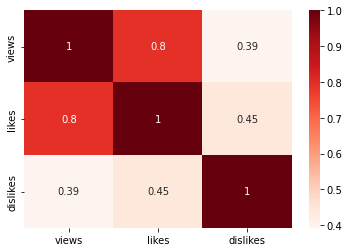

In [6]:
df_heat = df_GB[['views','likes','dislikes']]
sns.heatmap(df_heat.corr(), cmap='Reds', annot=True)

In [7]:
import matplotlib.pyplot as plt

502


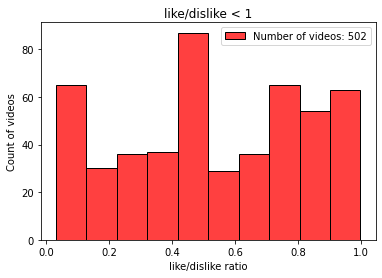

In [8]:
sns.histplot(df_GB[df_GB['like/dislike'] < 1]['like/dislike'], kde=False,color='#FF0000')
plt.xlabel('like/dislike ratio')
plt.ylabel('Count of videos')
plt.title('like/dislike < 1')
plt.legend(['Number of videos: 502'])
print(df_GB[df_GB['like/dislike'] < 1]['like/dislike'].count())

There are 502 videos that reached the recommeneded page
with more dislikes than they did likes.
Lets take a closer look.

In [9]:
print(df_GB[df_GB['like/dislike'] < 0.05]['title'])

6199          PSA from Chairman of the FCC Ajit Pai
6412          PSA from Chairman of the FCC Ajit Pai
6617          PSA from Chairman of the FCC Ajit Pai
6823          PSA from Chairman of the FCC Ajit Pai
7040          PSA from Chairman of the FCC Ajit Pai
7254          PSA from Chairman of the FCC Ajit Pai
7476          PSA from Chairman of the FCC Ajit Pai
7685          PSA from Chairman of the FCC Ajit Pai
7891          PSA from Chairman of the FCC Ajit Pai
8104          PSA from Chairman of the FCC Ajit Pai
8312          PSA from Chairman of the FCC Ajit Pai
8519          PSA from Chairman of the FCC Ajit Pai
8728          PSA from Chairman of the FCC Ajit Pai
8939          PSA from Chairman of the FCC Ajit Pai
9146          PSA from Chairman of the FCC Ajit Pai
9354          PSA from Chairman of the FCC Ajit Pai
9575          PSA from Chairman of the FCC Ajit Pai
9777          PSA from Chairman of the FCC Ajit Pai
9985          PSA from Chairman of the FCC Ajit Pai
14035    Rol

C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='like/dislike', ylabel='comments_disabled'>

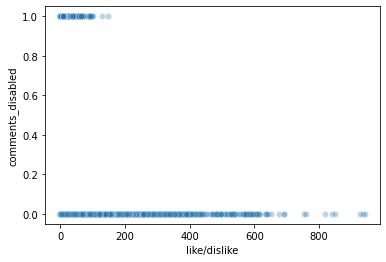

In [10]:
df_GB['comments_disabled'] = df_GB['comments_disabled'].apply(lambda x: 1 if x==True else 0)
sns.scatterplot(df_GB['like/dislike'], df_GB['comments_disabled'],alpha=0.3)

From this graph we can see the all videos that disable comments have
a like/dislike ratio of less than 200.

In [11]:
from sklearn.cluster import KMeans
num = 5
km = KMeans(n_clusters=num)

In [12]:
y_predict = km.fit_predict(df_GB[['likes','dislikes']])
df_GB['clusters'] = y_predict

C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

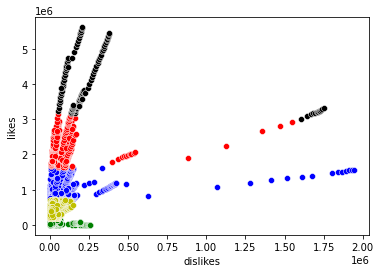

In [13]:
colours = ['g','b','r','y','k']
for i in range(num):
    colour_use = colours[i]
    df1 = df_GB[df_GB['clusters']==i]
    sns.scatterplot(df1.dislikes,df1.likes, color=colour_use)

are there seasons certain categories go through.
Check if music categorys do better in the summer

Sentiment analysis in a variety of forms
Categorising YouTube videos based on their comments and statistics.
Training ML algorithms like RNNs to generate their own YouTube comments.
Analysing what factors affect how popular a YouTube video will be.
Statistical analysis over time

In [14]:
print(df_GB['category_id'].unique())


[26 24 10 17 25 22 23 28 15 27  1 20  2 19 29 43]


In [15]:
print(df_GB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 18 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null int64
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
like/dislike              38644 non-null float64
clusters                  38916 non-null int32
dtypes: bool(2), float64(1), int32(1)

In [16]:
publish_date = df_GB['publish_time']
trending_date = df_GB['trending_date']

In [17]:
print(publish_date)
print(trending_date.value_counts())

0        2017-11-10T07:38:29.000Z
1        2017-11-12T06:24:44.000Z
2        2017-11-10T17:00:03.000Z
3        2017-11-13T02:30:38.000Z
4        2017-11-13T01:45:13.000Z
                   ...           
38911    2018-05-09T07:00:01.000Z
38912    2018-05-11T17:09:16.000Z
38913    2018-05-08T11:05:08.000Z
38914    2018-05-08T20:32:32.000Z
38915    2018-05-11T04:06:35.000Z
Name: publish_time, Length: 38916, dtype: object
17.26.12    200
18.02.03    200
18.30.01    200
18.22.01    200
17.16.12    200
           ... 
18.24.05    155
18.21.05    154
18.23.05    153
18.22.05    152
18.15.05    148
Name: trending_date, Length: 205, dtype: int64


The published date includes the hour, minute and second.
This information is uselss when comparing with
the date the video got on the trending page as
the trending date only increments days.

The format of the trending date is Year/Day/Month,
i want both columns in Day/Month/Year.

In [18]:
trending_date = trending_date.apply(lambda x: '20'+x)
trending_date = pd.to_datetime(trending_date, format='%Y.%d.%m')
print(trending_date)

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
38911   2018-06-14
38912   2018-06-14
38913   2018-06-14
38914   2018-06-14
38915   2018-06-14
Name: trending_date, Length: 38916, dtype: datetime64[ns]


In [19]:
publish_date = publish_date.apply(lambda x: x.split('T')[0])
publish_date = pd.to_datetime(publish_date, format='%Y-%m-%d')
print(publish_date)

0       2017-11-10
1       2017-11-12
2       2017-11-10
3       2017-11-13
4       2017-11-13
           ...    
38911   2018-05-09
38912   2018-05-11
38913   2018-05-08
38914   2018-05-08
38915   2018-05-11
Name: publish_time, Length: 38916, dtype: datetime64[ns]


If i sort the data then the videos will be ordered by the
date from, first on trending till the day it leaves
the trending page.
I could also see how long the videos stay on the trending page
by category even.
How to do this.
Sort the data, with this i can work out the first and last
position of a video and look at the dates. From that
it is easy to get the time from upload to trending and
how long they were trending.

In [20]:
df_GB['trending_date'] = trending_date
df_GB['publish_date'] = publish_date
df_days = df_GB[['title','publish_date','trending_date']]

In [21]:
print(df_days)

                                                   title publish_date  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   2017-11-10   
1              Taylor Swift: …Ready for It? (Live) - SNL   2017-11-12   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   2017-11-10   
3      Goals from Salford City vs Class of 92 and Fri...   2017-11-13   
4      Dashcam captures truck's near miss with child ...   2017-11-13   
...                                                  ...          ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   2018-05-09   
38912  Jacob Sartorius - Up With It (Official Music V...   2018-05-11   
38913                 Anne-Marie - 2002 [Official Video]   2018-05-08   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   2018-05-08   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   2018-05-11   

      trending_date  
0        2017-11-14  
1        2017-11-14  
2        2017-11-14  
3        2017-11-14  
4        2017

In [22]:
df_days = df_days.sort_values(by=['title','trending_date'])
print(df_days.head(30))

                                                   title publish_date  \
146    #21 How to go FAST!!! Coaching famous youtuber...   2017-11-05   
358    #21 How to go FAST!!! Coaching famous youtuber...   2017-11-05   
567    #21 How to go FAST!!! Coaching famous youtuber...   2017-11-05   
13797  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
13999  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
14221  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
14455  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
14682  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
14894  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
15110  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
15285  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
15508  #ConanHaiti Preview: Haitians Roast Trump  - C...   2018-01-23   
15725  #ConanHaiti Preview: Haitians Roast Trump  -

Maroon 5 - Wait                                                                         40
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                               38
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights           38
Anne-Marie - 2002 [Official Video]                                                      38
To Our Daughter                                                                         38
                                                                                        ..
What Happened to Marvel Heroes w/Anthony Gallegos - Kinda Funny Games Daily 11.27.17     1
My Friends Ruined My Tree?! (Clickbait) - COLLABMAS DAY THREE!                           1
I, Tonya Trailer #1 (2017) | Movieclips Trailers                                         1
COME CHRISTMAS SHOPPING WITH US AND FOR DOUBLE DATE NIGHT | VLOGMAS 63                   1
TIME Person of the Year 2017: The Silence Breakers | POY 2017 | TIME                     1

Text(0.5, 1.0, 'Time a video spends trending')

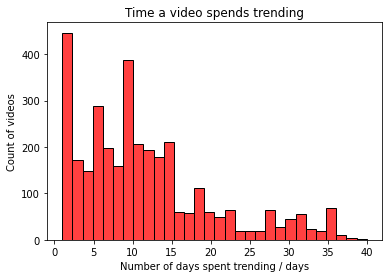

In [23]:

unique_names = df_days['title'].value_counts()
print(unique_names)
sns.histplot(unique_names, color='#FF0000')
plt.xlabel('Number of days spent trending / days')
plt.ylabel('Count of videos')
plt.title('Time a video spends trending')

The above plot is a histogram for the number of
days spent trending.

In [24]:
time_to_trend = []
df_to_trend = df_days.drop_duplicates(subset=['title'], keep='first')
for i in range(len(df_days['title'].unique())):
    time_to_trend.append((df_to_trend.iloc[i]['trending_date']-
                          df_to_trend.iloc[i]['publish_date']).days)

time_to_trend = [x for x in time_to_trend if x <= 25]

3.8205675115239055


Text(0.5, 1.0, 'Time taken for a video to trend from upload')

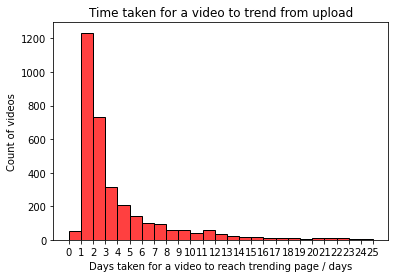

In [25]:
print(np.std(time_to_trend))
sns.histplot(time_to_trend, bins = 25, color='red')
plt.xticks(range(0,26))
plt.xlabel('Days taken for a video to reach trending page / days')
plt.ylabel('Count of videos')
plt.title('Time taken for a video to trend from upload')

Removing days to trend past 40 days which is 653 values,
we obtain quite differnet results.

Tags, seperate the tags into individual words.
With this i can determine the most popular tags on videos.

In [26]:
print(df_GB['tags'])

0        christmas|"john lewis christmas"|"john lewis"|...
1        SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
2        Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
3        Salford City FC|"Salford City"|"Salford"|"Clas...
4                                                   [none]
                               ...                        
38911    Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...
38912    jacob sartorius|"jacob"|"up with it"|"jacob sa...
38913    anne|"marie"|"anne-marie"|"2002"|"two thousand...
38914    Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...
38915    Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...
Name: tags, Length: 38916, dtype: object


In [27]:
tags = df_GB['tags']
tags = tags.str.replace('"','')
tags = tags.str.split('|')
tags = tags.apply(lambda x: ' '.join(x))

In [28]:
print(tags.value_counts())

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                             2010
James Corden The Late Late Show Colbert late night late night show Stephen Colbert Comedy monologue comedian impressions celebrities carpool karaoke CBS Late Late Show Corden joke jokes funny funny video funny videos humor celebrity celeb hollywood famous                                                                                                                                                                                                                     100
BIGHIT 빅히트 방탄소년단 BTS BANGTAN 방탄                         

Most popular channels

In [29]:
channel = df_GB[['channel_title','views','like/dislike']]

In [30]:
print(channel)

                    channel_title     views  like/dislike
0                      John Lewis   7224515      5.433883
1             Saturday Night Live   1053632     11.142546
2                      EminemVEVO  17158579     18.134961
3      Salford City Football Club     27833     16.083333
4                Cute Girl Videos      9815     15.000000
...                           ...       ...           ...
38911         EnriqueIglesiasVEVO  25066952     20.972229
38912             Jacob Sartorius   1492219      4.498803
38913                  Anne-Marie  29641412     44.402834
38914     Eurovision Song Contest  14317515      3.310518
38915              SuperDuperKyle    607552     66.682482

[38916 rows x 3 columns]


In [31]:
pivot_channel = pd.pivot_table(channel, index=channel['channel_title'],
                               values=channel[['views','like/dislike']])

                        like/dislike         views
channel_title                                     
- camilla                  13.840557  1.363377e+06
09W HYPE                   43.019681  1.602193e+05
14,999,999 views            2.142172  2.126282e+05
1theK (원더케이)              147.094108  5.428111e+06
20th Century Fox           52.042020  1.078670e+07
...                              ...           ...
東宝MOVIEチャンネル                     NaN  3.693529e+05
米津玄師                      126.027199  3.645269e+06
여자친구 GFRIEND OFFICIAL      49.781036  1.269748e+06
영국남자 Korean Englishman     55.868364  1.320330e+06
특이한동물채널                    77.214655  1.712163e+06

[1625 rows x 2 columns]


C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='views', ylabel='like/dislike'>

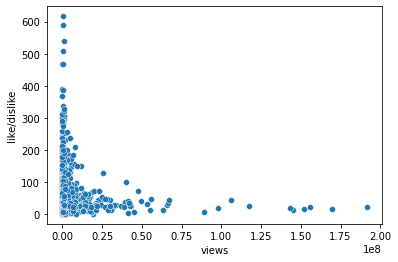

In [32]:
print(pivot_channel)
sns.scatterplot(pivot_channel['views'],pivot_channel['like/dislike'])

In [33]:
top_100_channels_by_views = pivot_channel.sort_values(by='views', ascending=False).head(100)
print(top_100_channels_by_views)
print(top_100_channels_by_views[top_100_channels_by_views.index.str.contains('VEVO')].count())

                     like/dislike         views
channel_title                                  
Bad Bunny               21.867221  1.914245e+08
ChildishGambinoVEVO     16.771805  1.694808e+08
Flow La Movie           21.430173  1.561042e+08
NickyJamTV              16.358681  1.520748e+08
BeckyGVEVO              11.859956  1.449770e+08
...                           ...           ...
SeanPaulVEVO            52.094847  1.303950e+07
chayanneVEVO            11.179529  1.272289e+07
Jaden Smith             14.703043  1.254524e+07
HowToBasic              34.277951  1.226968e+07
DJSnakeVEVO             40.681724  1.203948e+07

[100 rows x 2 columns]
like/dislike    52
views           52
dtype: int64


52% of the top 100 channels by views are VEVO music channels, this is not all
the music channels as many other music channels don't contain VEVO.

<AxesSubplot:xlabel='like/dislike', ylabel='Count'>

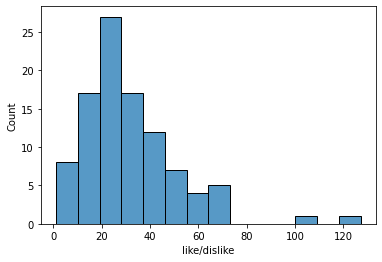

In [34]:
sns.histplot(top_100_channels_by_views['like/dislike'])

C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


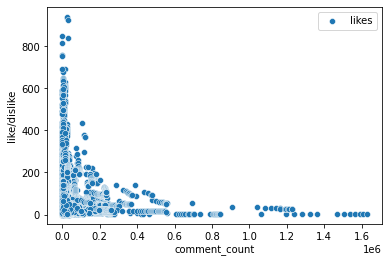

In [35]:
sns.scatterplot(df_GB['comment_count'],df_GB['like/dislike'])
plt.legend(labels=['likes','dislikes'])

From this scatter plot we can see that the lower
the like/dislike ratio the higher the comment count.

Comment count for the top channels.

In [36]:
top_100_channels_by_comments = pd.pivot_table(df_GB,
                                              index=['channel_title'],
                                              values=['comment_count','comments_disabled'])
top_100_channels_by_comments = top_100_channels_by_comments.sort_values(by='comment_count',ascending=False)

                      comment_count  comments_disabled
channel_title                                         
YouTube Spotlight     528228.703704           0.000000
Logan Paul Vlogs      441040.306667           0.000000
ChildishGambinoVEVO   428942.805556           0.000000
ibighit               350224.591667           0.000000
Lucas Lucco           263916.115385           0.000000
ArianaGrandeVevo      224836.457143           0.000000
shane                 200244.538462           0.000000
Bad Bunny             170206.750000           0.000000
HowToBasic            160021.024390           0.000000
DrakeVEVO             148802.870968           0.000000
LuisFonsiVEVO         144217.000000           0.000000
Queen Naija           130843.954545           0.000000
TaylorSwiftVEVO       105562.352941           0.000000
jypentertainment      101313.025806           0.000000
Desimpedidos           88920.250000           0.000000
Jake Paul              85572.606061           0.000000
shakiraVEV

<AxesSubplot:xlabel='comment_count', ylabel='Count'>

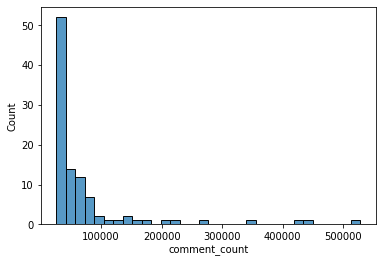

In [37]:
print(top_100_channels_by_comments.head(50))
top_100_channels_by_comments = top_100_channels_by_comments[top_100_channels_by_comments['comments_disabled']==0].head(100)
sns.histplot(top_100_channels_by_comments['comment_count'])

All channels below 10000 comments. for the histogram
Need to drop duplicates on video_id, as a single video
can reach the trending page multiple times the first
instance of trending should be counted.


In [38]:

print(df_GB[df_GB['category_id']==43]['video_id'])

35574    JtIY1Naxg0M
35748    JtIY1Naxg0M
35922    JtIY1Naxg0M
36092    JtIY1Naxg0M
36261    JtIY1Naxg0M
36443    JtIY1Naxg0M
36616    JtIY1Naxg0M
36792    JtIY1Naxg0M
36962    JtIY1Naxg0M
37126    JtIY1Naxg0M
37294    JtIY1Naxg0M
37468    JtIY1Naxg0M
37646    JtIY1Naxg0M
37824    JtIY1Naxg0M
38001    JtIY1Naxg0M
38180    JtIY1Naxg0M
38348    JtIY1Naxg0M
38520    JtIY1Naxg0M
38697    JtIY1Naxg0M
38866    JtIY1Naxg0M
Name: video_id, dtype: object


In [39]:
category = {1:'Film & Animation',
            2:'Autos & Vehicles',
            10:'Music',
            15:'Pets & Animals',
            17:'Sports',
            19:'Travel & Events',
            20:'Gaming',
            22:'People & Blogs',
            23:'Comedy',
            24:'Entertainment',
            25:'News & Politics',
            26:'Howto & Style',
            27:'Education',
            28:'Science & Technology',
            29:'Nonprofits & Activism'}

In [40]:
print(df_GB['category_id'].unique())
df_GB['category_id'] = df_GB['category_id'].apply(lambda x:
                                                  24 if x==43 else x)
print(df_GB['category_id'].unique())

[26 24 10 17 25 22 23 28 15 27  1 20  2 19 29 43]
[26 24 10 17 25 22 23 28 15 27  1 20  2 19 29]


any category with value 43 is actually value 24.

In [89]:
new_df_GB = df_GB
new_df_GB = new_df_GB.sort_values(by=['title','views'], ascending=True)
new_df_GB['likes/views'] = new_df_GB['likes']/new_df_GB['views']
new_df_GB['likes/dislikes'] = new_df_GB['likes']/new_df_GB['dislikes']
new_df_GB['dislikes/views'] = new_df_GB['dislikes']/new_df_GB['views']

new_df_GB = new_df_GB.drop_duplicates(subset='title', keep='last')
views_by_category = new_df_GB.groupby('category_id')['views'].sum().sort_values()
count_by_category = new_df_GB.groupby('category_id')['views'].count().sort_values()
like_by_category = new_df_GB.groupby('category_id')['likes'].mean().sort_values()
dislike_by_category = new_df_GB.groupby('category_id')['dislikes'].mean().sort_values()
like_view_by_category = new_df_GB.groupby('category_id')['likes/views'].mean().sort_values()
dislike_view_by_category = new_df_GB.groupby('category_id')['dislikes/views'].mean().sort_values()

sorted_dislike = dislike_by_category.sort_index()
sorted_like = like_by_category.sort_index()
like_dislike_by_category = (sorted_like/sorted_dislike).sort_values()

views_by_category_index_names = []
for i in views_by_category.index:
    views_by_category_index_names.append(category[i])

count_by_category_index_names = []
for i in count_by_category.index:
    count_by_category_index_names.append(category[i])

like_by_category_index_names = []
for i in like_by_category.index:
    like_by_category_index_names.append(category[i])

dislike_by_category_index_names = []
for i in dislike_by_category.index:
    dislike_by_category_index_names.append(category[i])

like_view_by_category_index_names = []
for i in like_view_by_category.index:
    like_view_by_category_index_names.append(category[i])

like_dislike_by_category_index_names = []
for i in like_dislike_by_category.index:
    like_dislike_by_category_index_names.append(category[i])

dislike_view_by_category_index_names = []
for i in dislike_view_by_category.index:
    dislike_view_by_category_index_names.append(category[i])

C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
C:\Users\James\PycharmProjects\pythonProject3\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positio

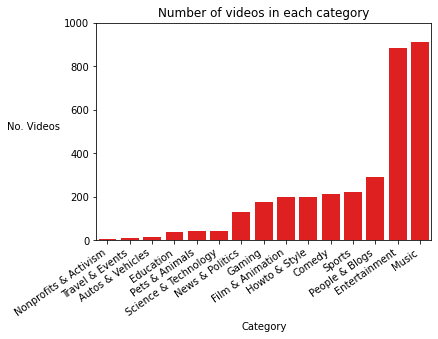

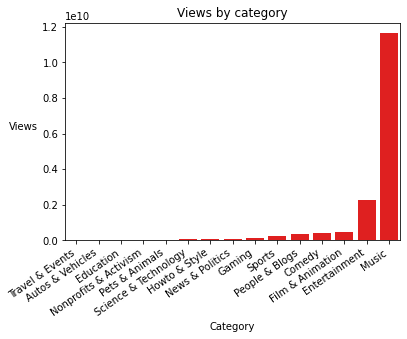

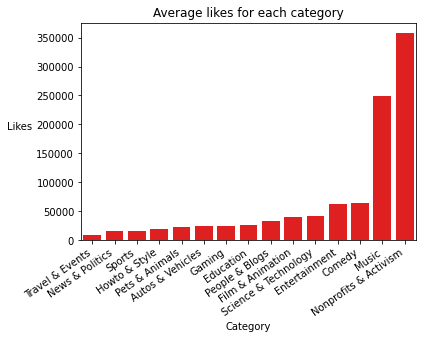

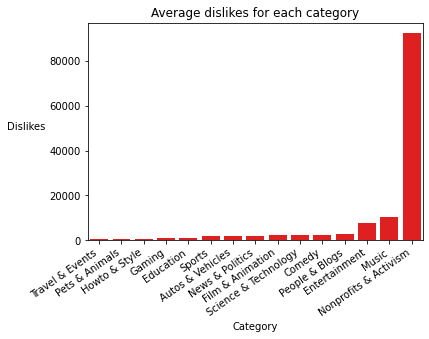

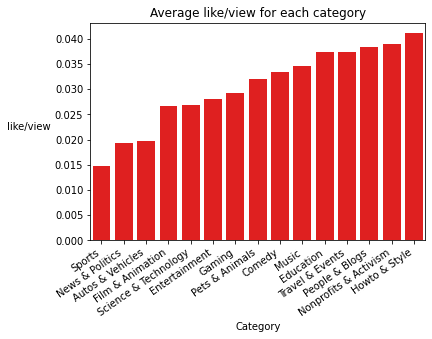

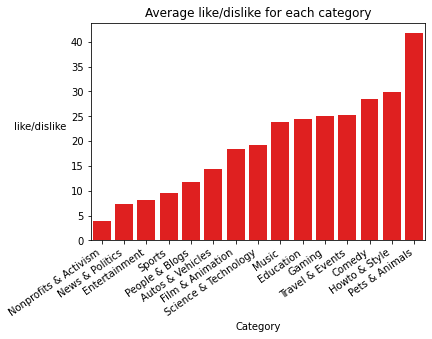

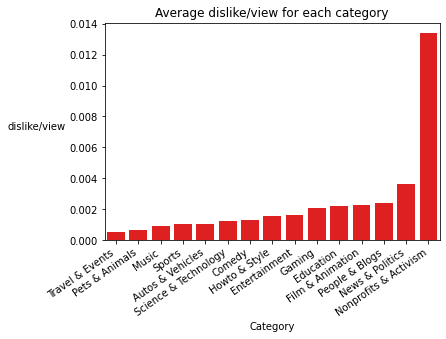

In [90]:
sns.barplot(count_by_category_index_names, sorted(count_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Number of videos in each category')
plt.yticks(range(0,1200, 200))
plt.xlabel('Category')
plt.ylabel('No. Videos', rotation=0, ha='right')
plt.show()

x = views_by_category_index_names
y = sorted(views_by_category.values)
sns.barplot(x, y, color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Views by category')
plt.xlabel('Category')
plt.ylabel('Views', rotation=0, ha='right')
plt.show()

sns.barplot(like_by_category_index_names, sorted(like_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Average likes for each category')
plt.xlabel('Category')
plt.ylabel('Likes', rotation=0, ha='right')
plt.show()

sns.barplot(dislike_by_category_index_names, sorted(dislike_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Average dislikes for each category')
plt.xlabel('Category')
plt.ylabel('Dislikes', rotation=0, ha='right')
plt.show()

sns.barplot(like_view_by_category_index_names, sorted(like_view_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Average like/view for each category')
plt.xlabel('Category')
plt.ylabel('like/view', rotation=0, ha='right')
plt.show()

sns.barplot(like_dislike_by_category_index_names, sorted(like_dislike_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Average like/dislike for each category')
plt.xlabel('Category')
plt.ylabel('like/dislike', rotation=0, ha='right')
plt.show()

sns.barplot(dislike_view_by_category_index_names, sorted(dislike_view_by_category), color='#FF0000')
plt.xticks(rotation=35, ha='right')
plt.legend().remove()
plt.title('Average dislike/view for each category')
plt.xlabel('Category')
plt.ylabel('dislike/view', rotation=0, ha='right')
plt.show()

In [43]:
df_unique_titles = df_GB.drop_duplicates(subset='title', keep='first')
list_of_titles = []
df_unique_titles['title'].apply(lambda x: list_of_titles.append(x))

0        None
1        None
2        None
3        None
4        None
         ... 
38763    None
38767    None
38782    None
38793    None
38887    None
Name: title, Length: 3369, dtype: object

In [44]:
list_of_titles = ' '.join(list_of_titles)
print(list_of_titles)
list_of_titles = list_of_titles.split(' ')
print(list_of_titles)

John Lewis Christmas Ad 2017 - #MozTheMonster Taylor Swift: …Ready for It? (Live) - SNL Eminem - Walk On Water (Audio) ft. Beyoncé Goals from Salford City vs Class of 92 and Friends at The Peninsula Stadium! Dashcam captures truck's near miss with child in Norway How My Relationship Started! Ed Sheeran - Perfect (Official Music Video) CHRISTMAS HAS GONE TO MY HEAD Elbow - Golden Slumbers (John Lewis Advert 2017) Jennifer Lopez - Amor, Amor, Amor (Official Video) ft. Wisin CAN BABIES DO GYMNASTICS?  **World Record** TV Reporter Interviews Alleged Bank Robber, Then Helps Police Catch Him Gucci Mane  - Curve (ft. The Weeknd) EXTREME GOLDEN TAN TRANSFORMATION How To Dry a Shirt in 30 Seconds Attracting An Alpaca With An Accordion | Nowhere Else Sam Smith surprises brides at their wedding! (At The BBC) Camila Cabello - Havana (Vertical Video) ft. Young Thug When Someone Has A Crush on You | Lilly Singh Taylor Swift - “New Year’s Day” Fan Performance SO Much To Tell You | 32 Weeks Pregnant |

In [45]:
category_words = pd.Series(list_of_titles)
category_words = category_words.astype('category')
print(category_words.cat.codes)

0        4520
1        4977
2        2158
3         970
4         663
         ... 
30066    8500
30067    8470
30068    7823
30069    7865
30070    8827
Length: 30071, dtype: int16


In [46]:
category_words = category_words.to_frame().join(pd.Series(list_of_titles))
print(category_words)

ValueError: Other Series must have a name